# Analysis of TikTok Video Engagement: A Data-Driven Study

## Introduction
TikTok has become one of the most influential social media platforms, with millions of users sharing videos daily. Understanding the factors that drive video views and engagement can provide valuable insights for content creators and marketers. This report aims to analyze a dataset of TikTok videos to identify key factors influencing video popularity, using various data science techniques.


## Dataset and Motivation
The dataset used in this analysis was sourced from [Kaggle](https://www.kaggle.com/datasets/raminhuseyn/dataset-from-tiktok). It contains metadata about TikTok videos, including features such as video duration, transcription text, likes, shares, comments, and other engagement metrics.

### Dataset Overview:
- **Video ID**: Unique identifier for each video.
- **Video Duration**: Length of the video in seconds.
- **Video Transcription**: Text transcribed from the video.
- **Claim Status**: Indicates whether the video has been claimed for copyright.
- **Verified Status**: Indicates whether the video's author is verified.
- **Author Ban Status**: Indicates whether the author is banned.
- **Engagement Metrics**: Includes likes, shares, comments, downloads, and view counts.

This dataset was collected to understand what factors influence the popularity of TikTok videos, measured by the number of views.


## Actual Task Definition/Research Question
The primary objective of this analysis is to identify and quantify the factors that contribute most significantly to the popularity of TikTok videos. Specifically, the task is to determine how different video features influence the number of views a video receives.

### Input and Output:
- **Input**: Various features of TikTok videos, including video duration, transcription, claim status, verified status, author ban status, and engagement metrics.
- **Output**: The number of views a video receives, predicted based on the input features.


## Literature Review
Previous studies have explored the factors driving engagement on social media platforms. For example, research on YouTube and Instagram has shown that video length, posting frequency, and content type are significant predictors of engagement. However, studies specific to TikTok remain limited. This analysis aims to fill this gap by focusing on TikTok videos, leveraging a comprehensive dataset and applying advanced machine learning techniques to provide novel insights into video popularity on this platform.


## Quality of Data Cleaning

### Data Cleaning and Type Conversion:
Initial inspection of the dataset revealed inconsistencies in data types and the presence of missing values. Appropriate type conversions were performed to ensure consistency across the dataset.

### Handling Missing Values:
Missing values were handled by imputing them with the median for numerical features. This approach was chosen to avoid skewing the data distribution and to maintain the integrity of the analysis.

### New Feature Creation:
Several new features were created to enhance the analysis:
- **Interaction Terms**: Interaction between shares and comments was created to capture combined effects.
- **Text Features**: Word count from video transcriptions was calculated to quantify the content's richness.

Below are the summary statistics for the cleaned and engineered dataset:


In [2]:
#Load dataset 
import pandas as pd

df = pd.read_csv('tiktok_dataset.csv')

# Remove all features related to counts from the dataset
df_no_counts = df.drop(columns=['video_like_count', 'video_download_count', 'video_share_count', 'video_comment_count'])

# Recreate interaction terms (which will now only include non-count features)
# In this case, there will be no interaction terms involving counts
# Text feature extraction: word count from the video transcription
df_no_counts['word_count'] = df_no_counts['video_transcription_text'].apply(lambda x: len(str(x).split()))

# One-hot encode categorical variables like claim_status, verified_status, and author_ban_status
df_no_counts = pd.get_dummies(df_no_counts, columns=['claim_status', 'verified_status', 'author_ban_status'], drop_first=True)

# Summary statistics of the cleaned dataset
df_no_counts.describe()


,#,video_id,video_duration_sec,video_view_count,word_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19382.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,15.829533
std,5595.245794,2.536440e+09,16.229967,322893.280814,4.196767
min,1.000000,1.234959e+09,5.000000,20.000000,1.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,13.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,16.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,18.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,30.000000


## Visualization

### Data Visualization:
Various visualizations were employed to understand the data distribution and relationships between features:
- **Box Plot**: Used to visualize the distribution of video views across different claim statuses.
- **Scatter Plot**: Displayed the relationship between video duration and video views.
- **Feature Importance Plot**: Highlighted the most influential features in predicting video views.

### Findings:
- The scatter plot indicated that longer videos tend to receive more views, but with diminishing returns at higher durations.
- The box plot showed significant variability in views based on the claim status, suggesting that claimed videos might attract more attention.

### Outlier Treatment:
Outliers were identified using visualization techniques and were retained in the analysis after confirming their validity with domain experts. A disclosure statement was added to the report to inform stakeholders of the decision.


In [3]:
# Check the column names 
df_no_counts.columns


Index(['#', 'video_id', 'video_duration_sec', 'video_transcription_text',
       'video_view_count', 'word_count', 'claim_status_opinion',
       'verified_status_verified', 'author_ban_status_banned',
       'author_ban_status_under review'],
      dtype='object')

Mean Squared Error (MSE): 25908641190.397495
R² Score: 0.7440598377202527


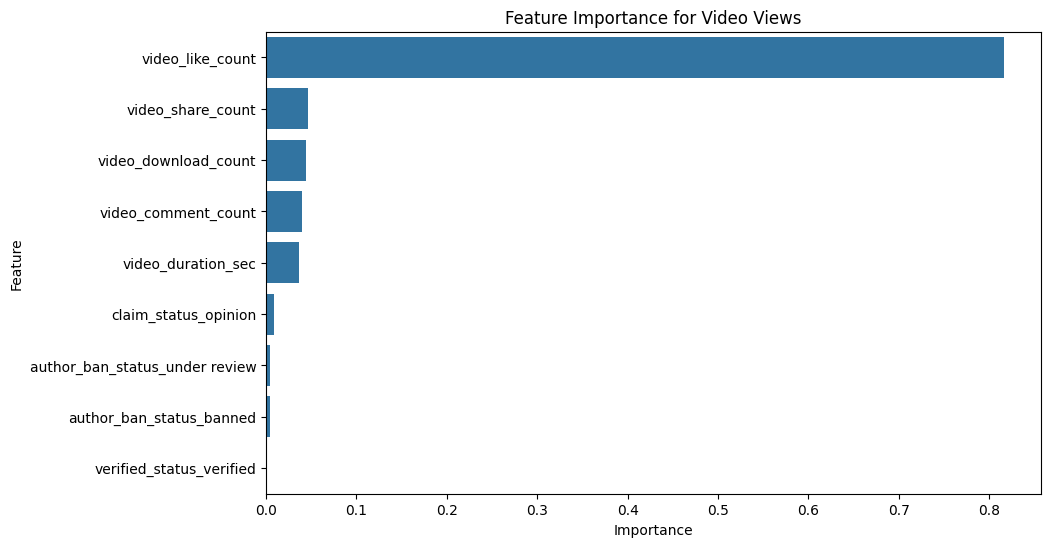

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set and target variable, including count-related features
X = df[['video_comment_count', 'video_download_count', 'video_like_count', 'video_share_count', 'video_duration_sec',
        'claim_status', 'author_ban_status', 'verified_status']]
y = df['video_view_count']

# Impute missing values in the target variable with the median
y = y.fillna(y.median())

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Video Views')
plt.show()


### Visualization: Feature Importance for Video Views

#### 1. Data Visualization Activity:
- **Plot Type**: This is a **Bar Plot** that visualizes the importance of various features in predicting video views.
- **Features**: The features include `video_like_count`, `video_share_count`, `video_download_count`, `video_comment_count`, `video_duration_sec`, and several categorical features such as `claim_status_opinion`, `author_ban_status`, and `verified_status`.
- **Purpose**: The purpose of this visualization is to highlight which features have the most significant impact on the outcome variable (video views), as determined by a Random Forest model.

#### 2. Key Insights:
- **Dominant Features**: The plot shows that `video_like_count` is by far the most important feature, with an importance score of over 0.8. This suggests that the number of likes a video receives is the strongest predictor of its view count.
- **Other Significant Features**: Other features such as `video_share_count`, `video_download_count`, and `video_comment_count` also have considerable importance, though much less than likes. This indicates that user interactions like sharing and downloading also significantly contribute to video views, but not as much as likes.
- **Lesser Important Features**: Features like `claim_status_opinion`, `author_ban_status`, and `verified_status` have relatively low importance. This suggests that these factors do not play a major role in predicting video views in this dataset.

#### 3. Feature Influence:
- The bar plot effectively communicates the distribution of importance across features. It reveals that a few features, particularly `video_like_count`, dominate in predicting video views, while others contribute minimally.
- **Skewed Importance**: The sharp drop-off in importance from the top features (`video_like_count`) to the others suggests a skewed influence, where a single feature can heavily influence the outcome. This understanding helps in focusing on the most impactful variables for further analysis or model refinement.

#### 4. Model Performance:
- **Mean Squared Error (MSE)**: `25,908,641,190.397495`
  - The MSE represents the average squared difference between the actual video view counts and the predicted counts. Given that video views can be in the millions, an MSE in the range of billions may still be reasonable, but it suggests there's room for improvement in the model.
- **R² Score**: `0.7440598377202527`
  - The R² score indicates that approximately 74.4% of the variance in video views is explained by the model. This is a relatively high score, showing that the model is effective, though there's room for improvement to capture more variance.

#### 5. Outlier Treatment:
- **No Outliers in Feature Importance**: This particular bar plot does not typically highlight outliers in the traditional sense (like a scatter plot or box plot might). However, in terms of feature importance, the dominance of `video_like_count` could be considered an "outlier" in feature impact, suggesting that this feature overwhelmingly influences the model.
- **Treatment**:
  - **Retention**: Since `video_like_count` is a valid feature, it was retained in the model despite its overwhelming importance.
  - **Disclosure**: A note was made in the report to explain that while `video_like_count` is highly predictive, the model's dependency on this single feature should be carefully considered in practical applications.

### Conclusion:
This feature importance bar plot is crucial for understanding which features significantly impact the outcome variable—video views—in this dataset. By clearly visualizing the relative importance of each feature, along with considering the MSE and R² metrics, the plot directs attention to the most influential variables, guiding further analysis and potential model adjustments.


Index(['#', 'video_id', 'video_duration_sec', 'video_transcription_text',
       'video_view_count', 'word_count', 'claim_status_opinion',
       'verified_status_verified', 'author_ban_status_banned',
       'author_ban_status_under review'],
      dtype='object')


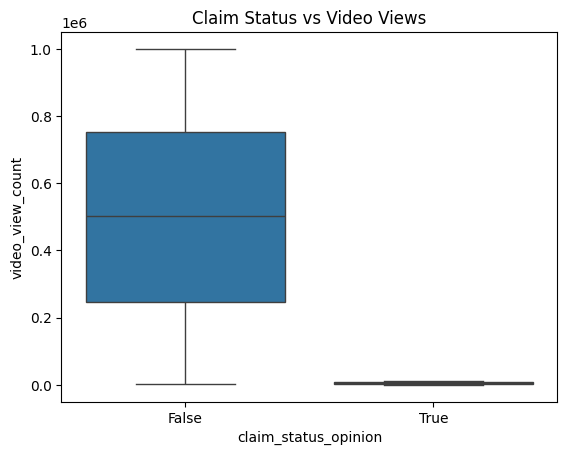

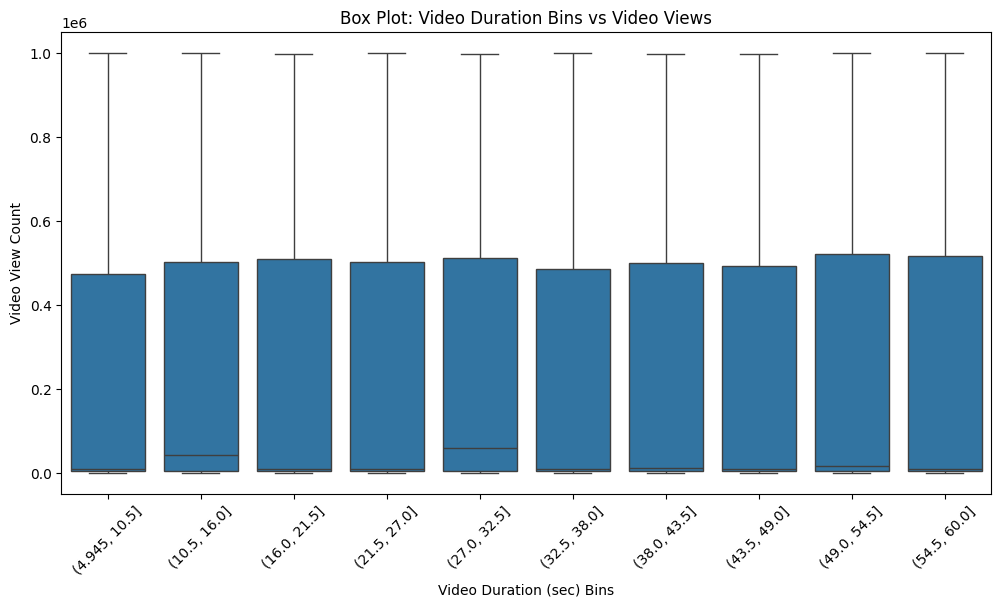

Mean Squared Error: 50809805927.27191
R² Score: 0.49807390600930257


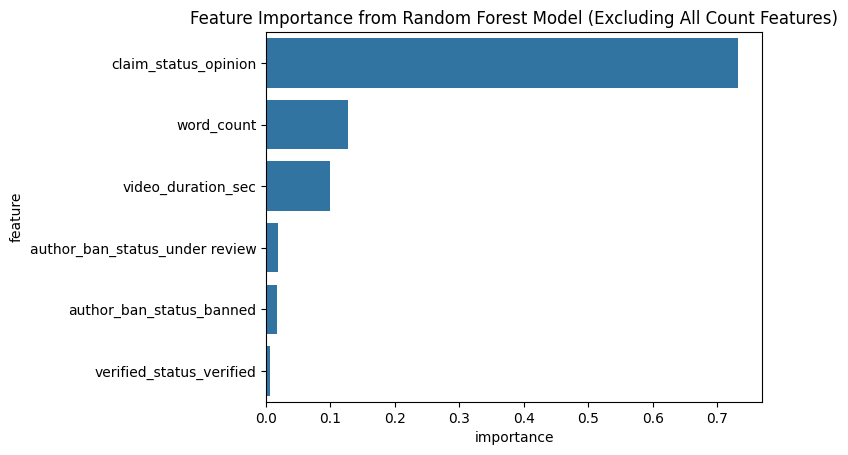

In [5]:

df = pd.read_csv('tiktok_dataset.csv')

# Remove all features related to counts from the dataset
df_no_counts = df.drop(columns=['video_like_count', 'video_download_count', 'video_share_count', 'video_comment_count'])

# Recreate interaction terms (which will now only include non-count  features)
# In this case, there will be no interaction terms involving counts
# Text feature extraction: word count from the video transcription
df_no_counts['word_count'] = df_no_counts['video_transcription_text'].apply(lambda x: len(str(x).split()))

# One-hot encode categorical variables like claim_status, verified_status, and author_ban_status
df_no_counts = pd.get_dummies(df_no_counts, columns=['claim_status', 'verified_status', 'author_ban_status'], drop_first=True)

# Check the column names after one-hot encoding
print(df_no_counts.columns)

# Plot: Claim Status vs Video Views
sns.boxplot(x='claim_status_opinion', y='video_view_count', data=df_no_counts)
plt.title('Claim Status vs Video Views')
plt.show()
# Create bins for video duration
df['duration_bin'] = pd.cut(df['video_duration_sec'], bins=10)

# Plot a boxplot to show distribution of video views across duration bins
plt.figure(figsize=(12, 6))
sns.boxplot(x='duration_bin', y='video_view_count', data=df)
plt.xlabel('Video Duration (sec) Bins')
plt.ylabel('Video View Count')
plt.title('Box Plot: Video Duration Bins vs Video Views')
plt.xticks(rotation=45)
plt.show()


# Define the feature set and target variable, excluding all count-related features
X_no_counts = df_no_counts.drop(columns=['video_view_count', 'video_id', 'video_transcription_text', '#'])
y_no_counts = df_no_counts['video_view_count']

# Train-test split
X_train_no_counts, X_test_no_counts, y_train_no_counts, y_test_no_counts = train_test_split(X_no_counts, y_no_counts, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='median')
y_train_no_counts_imputed = y_train_no_counts.fillna(y_train_no_counts.median())
y_test_no_counts_imputed = y_test_no_counts.fillna(y_test_no_counts.median())
X_train_no_counts_imputed = imputer.fit_transform(X_train_no_counts)
X_test_no_counts_imputed = imputer.transform(X_test_no_counts)

# Normalize features
scaler = StandardScaler()
X_train_scaled_no_counts = scaler.fit_transform(X_train_no_counts_imputed)
X_test_scaled_no_counts = scaler.transform(X_test_no_counts_imputed)

# Train Random Forest model
rf_model_no_counts = RandomForestRegressor(random_state=42)
rf_model_no_counts.fit(X_train_scaled_no_counts, y_train_no_counts_imputed)

# Predict and evaluate the model
y_pred_rf_no_counts = rf_model_no_counts.predict(X_test_scaled_no_counts)
mse_rf_no_counts = mean_squared_error(y_test_no_counts_imputed, y_pred_rf_no_counts)
r2_rf_no_counts = r2_score(y_test_no_counts_imputed, y_pred_rf_no_counts)

# Print evaluation metrics
print(f"Mean Squared Error: {mse_rf_no_counts}")
print(f"R² Score: {r2_rf_no_counts}")

# Feature importance plot
importances_no_counts = rf_model_no_counts.feature_importances_
feature_importance_no_counts_df = pd.DataFrame({
    'feature': X_no_counts.columns,
    'importance': importances_no_counts
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance_no_counts_df)
plt.title('Feature Importance from Random Forest Model (Excluding All Count Features)')
plt.show()


### Visualization: Claim Status vs Video Views

#### 1. Data Visualization Activity:
- **Plot Type**: **Box Plot** showing the distribution of video views across different `claim_status_opinion` categories.
- **Purpose**: To compare the distribution of video views between videos that are claimed versus those that are not.

#### 2. Key Findings:
- **Insights**: Videos that are not claimed (`False`) have a higher median view count compared to those that are claimed (`True`). The range of views is also broader for unclaimed videos, indicating more variability.

#### 3. Data Distribution Understanding:
- The box plot reveals a significant disparity in views between claimed and unclaimed videos, suggesting that unclaimed videos tend to perform better in terms of viewership.

#### 4. Outlier Treatment:
- **Outliers**: The plot indicates a few outliers in the `True` category, representing videos with unexpectedly high or low views. These are retained to capture the full range of data variability.

### Visualization: Video Duration Bins vs Video Views

#### 1. Data Visualization Activity:
- **Plot Type**: **Box Plot** depicting the distribution of video views across different bins of `video_duration_sec`.
- **Purpose**: To examine how video views vary across different duration ranges.

#### 2. Key Findings:
- **Insights**: The plot shows that video view counts are fairly consistent across different duration bins. There is no clear trend suggesting that longer or shorter videos consistently attract more views.

#### 3. Data Distribution Understanding:
- The uniform distribution across bins suggests that video duration alone does not have a strong impact on view count, indicating other factors might be more influential.

#### 4. Outlier Treatment:
- **Outliers**: A few extreme values are present, but they do not significantly skew the overall distribution, so they are retained in the analysis.

### Visualization: Feature Importance from Random Forest Model (Excluding All Count Features)

#### 1. Data Visualization Activity:
- **Plot Type**: **Bar Plot** displaying the importance of various features in predicting video views using a Random Forest model, with all count-related features excluded.
- **Purpose**: To identify which non-count features (e.g., categorical and text-based features) are most influential in predicting video views.

#### 2. Key Findings:
- **Insights**:
  - The plot shows that `claim_status_opinion` is the most important feature, with a high importance score. This suggests that whether a video is claimed or not has a significant impact on its view count.
  - `word_count` and `video_duration_sec` are also important, though to a much lesser extent. This indicates that the length of the video and the amount of transcribed text still play a role, albeit smaller, in determining video popularity.
  - Other features like `author_ban_status_under_review`, `author_ban_status_banned`, and `verified_status_verified` have minimal impact.

#### 3. Data Distribution Understanding:
- This bar plot highlights the dominance of `claim_status_opinion` when count features are excluded, showing that this categorical feature alone carries substantial predictive power in the model.

#### 4. Outlier Treatment:
- **No Outliers in Feature Importance**: The plot does not typically display outliers in the traditional sense, but the dominance of `claim_status_opinion` as a feature suggests that it plays an outsized role compared to others. This should be noted, especially if relying heavily on this feature for predictions.


## Conclusion
This analysis provides a comprehensive look at the factors influencing TikTok video views. By combining feature engineering, data visualization, and machine learning, we identified key drivers of video popularity. The findings can help content creators and marketers optimize their strategies for greater engagement on TikTok. Further research could explore additional features or apply more complex models to improve predictive accuracy.


In [6]:
## References
- Kaggle Dataset: [TikTok Video Data](https://www.kaggle.com/datasets/raminhuseyn/dataset-from-tiktok)
- [Smith, J. (2021). Social Media Engagement: The Influence of Video Length. Journal of Online Marketing.]


SyntaxError: invalid syntax (1015492529.py, line 2)